# Test 1: Classification

## Steel Plates Anomaly Detection

**Author:** Virginia Herrero [Email](mailto:v.herrero@outlook.com) | [LinkedIn](https://www.linkedin.com/in/virginia-herrero-casero/) | [GitHub](https://github.com/herrerovir)

### Introducción

Este proyecto consiste en un proceso completo de machine learning con el objetivo de predecir el tipo de defecto o anomalía producido en placas de acero industrial. Este notebook ofrece una guía paso a paso de cada etapa del ejercicio, desde el preprocesamiento de datos hasta la evaluación del modelo, destacando las técnicas y metodologías utilizadas a lo largo del camino.

Elegí este conjunto de datos por su relevancia en la industria 2.0 y en el control de calidad. La detección de anomalías en productos industriales es un excelente ejemplo para mostrar mis habilidades en ingeniería y ciencia de datos. Este proyecto ilustra cómo los enfoques basados en datos pueden optimizar la gestión de calidad y la toma de decisiones, siendo aplicables a diversas industrias.

### Dataset

El conjunto de datos utilizado en este proyecto se obtuvo de la página web Kaggle [here](https://www.kaggle.com/datasets/uciml/faulty-steel-plates).

Las variables de este conjunto de datos son las siguientes:

- `X_Minimum`

- `X_Maximum`

- `Y_Minimum`

- `Y_Maximum`

- `Pixels_Areas`

- `X_Perimeter`

- `Y_Perimeter`

- `Sum_of_Luminosity`

- `Minimum_of_Luminosity`

- `Maximum_of_Luminosity`

- `Length_of_Conveyer`

- `TypeOfSteel_A300`

- `TypeOfSteel_A400`

- `Steel_Plate_Thickness`

- `Edges_Index`

- `Empty_Index`

- `Square_Index`

- `Outside_X_Index`

- `Edges_X_Index`

- `Edges_Y_Index`

- `Outside_Global_Index`

- `LogOfAreas`

- `Log_X_Index`

- `Log_Y_Index`

- `Orientation_Index`

- `Luminosity_Index`

- `SigmoidOfAreas`

Los 7 defectos en las placas de acero son los siguientes: 

- `Pastry`

- `Z_Scratch`

- `K_Scatch`

- `Stains`

- `Dirtiness`

- `Bumps`

- `Other_Faults`

Carga el archivo CSV **steel-plates-faults-dataset** como un DataFrame de pandas.

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Normalizing
from sklearn.preprocessing import StandardScaler

# Modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve

# Hypertuning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Re-sampling
from imblearn.over_sampling import SMOTE

# Saving the model
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("../data/raw/Steel-plates-faults-dataset.csv")
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


### Data cleaning

Limpia y preprocesa el conjunto de datos antes de seguir con el análisis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

* **Renombrar columnas**

Se renombraron algunas columnas para mejorar la legibilidad y la comprensión del conjunto de datos.

In [4]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [5]:
df = df.rename(columns = {"TypeOfSteel_A300" : "Steel_Type_A300",
                          "TypeOfSteel_A400" : "Steel_Type_A400",
                          "LogOfAreas" : "Log_of_Areas",
                          "SigmoidOfAreas" : "Sigmoid_of_Areas",
                          "K_Scatch" : "K_Scratch"})

In [6]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,Sigmoid_of_Areas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


* **Tipos de datos**

Verifica que todas las columnas tengan los tipos de datos apropiados.

In [7]:
df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
Steel_Type_A300            int64
Steel_Type_A400            int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
Log_of_Areas             float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
Sigmoid_of_Areas         float64
Pastry                     int64
Z_Scratch                  int64
K_Scratch                  int64
Stains    

* **Valores nulos**

Identifica y elimina cualquier valor nulo en el conjunto de datos cuando sea necesario.

In [8]:
# Check the total of null values in each column
df.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
Steel_Type_A300          0
Steel_Type_A400          0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
Log_of_Areas             0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
Sigmoid_of_Areas         0
Pastry                   0
Z_Scratch                0
K_Scratch                0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

No hay valores nulos en el dataset.

* **Valores duplicados**

Verifica si hay valores duplicados en el conjunto de datos.

In [9]:
df.duplicated().sum()

np.int64(0)

No hay ninguna entrada duplicada en el dataset.

* **Outliers**

Revisa el resumen estadístico del conjunto de datos para detectar posibles valores atípicos. Esta evaluación inicial permitirá identificar cualquier valor inusual que necesite un análisis más detallado.

In [10]:
# Changes float format to display two decimals
pd.set_option("display.float_format", "{:.2f}".format)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.00,571.14,520.69,0.00,51.00,435.00,1053.00,1705.00
X_Maximum,1941.00,617.96,497.63,4.00,192.00,467.00,1072.00,1713.00
Y_Minimum,1941.00,1650684.87,1774578.41,6712.00,471253.00,1204128.00,2183073.00,12987661.00
Y_Maximum,1941.00,1650738.71,1774590.09,6724.00,471281.00,1204136.00,2183084.00,12987692.00
Pixels_Areas,1941.00,1893.88,5168.46,2.00,84.00,174.00,822.00,152655.00
X_Perimeter,1941.00,111.86,301.21,2.00,15.00,26.00,84.00,10449.00
Y_Perimeter,1941.00,82.97,426.48,1.00,13.00,25.00,83.00,18152.00
Sum_of_Luminosity,1941.00,206312.15,512293.59,250.00,9522.00,19202.00,83011.00,11591414.00
Minimum_of_Luminosity,1941.00,84.55,32.13,0.00,63.00,90.00,106.00,203.00
Maximum_of_Luminosity,1941.00,130.19,18.69,37.00,124.00,127.00,140.00,253.00


A primera vista, columnas como **X_Minimum**, **X_Maximum**, **Y_Minimum**, **Y_Maximum**, **Pixel_Areas**, **X_Perimeter**, **Y_Perimeter**, **Sum_of_Luminosity** y **Steel_plate_thickness** pueden contener valores atípicos. Esta conclusión se basa en la observación de que los valores máximos superan tanto la media, la mediana, y el tercerl cuartil, lo que puede indicar la presencia de outliers. Dado que estos pueden ser claros indicadores de defectos en las placas de acero, he decidido mantener los valores atípicos para no reducir las observaciones del conjunto de datos y contribuir a una mejor predicción del modelo.

* **El conjunto de datos limpio:**

In [12]:
defect_detection = df.copy()
defect_detection.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,Sigmoid_of_Areas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.82,-0.29,0.58,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.79,-0.18,0.30,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.67,-0.12,0.21,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.84,-0.16,0.52,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.93,-0.20,1.00,1,0,0,0,0,0,0


In [13]:
# Save the cleaned dataset
defect_detection.to_csv("../data/processed/Steel-plates-faults-cleaned-dataset.csv")

### Exploratory Data Analysis

En esta sección, se realiza un análisis exploratorio de datos en profundidad.

#### **Target Variable**

El primer paso es examinar la variable objetivo para obtener una visión general de su distribución.

El objetivo de este proyecto es predecir fallos en las placas de acero. Este conjunto de datos contiene 7 columnas que representan los 7 posibles fallos. Estas 7 columnas son la variable objetivo de este problema.

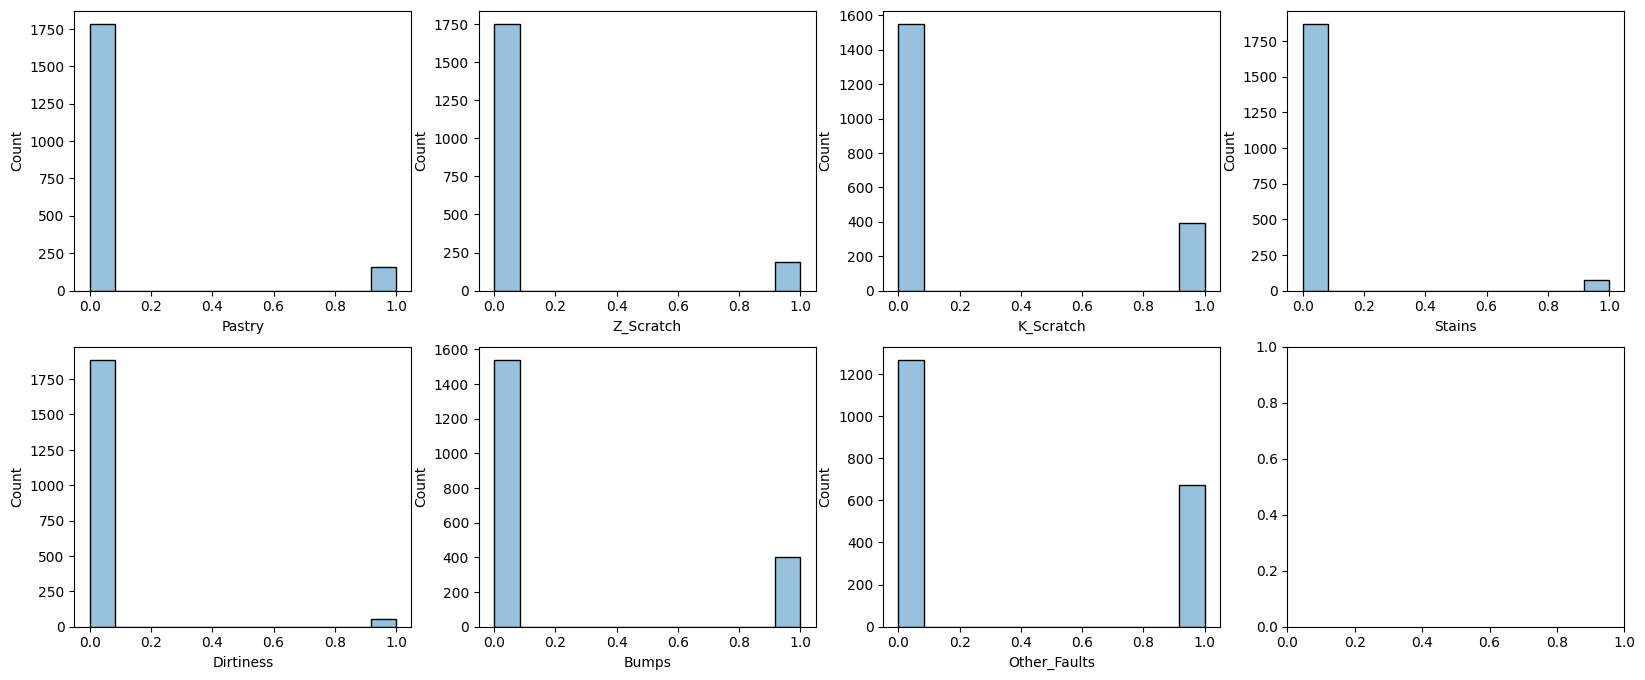

In [14]:
# Plot distribution of all target columns on the datasest
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
ax = ax.flatten()
for i, col in enumerate(defect_detection.columns[-7:]):
    sns.histplot(defect_detection[col], ax = ax[i], color = "#74add1")

Verifica si hay observaciones sin fallos.

In [15]:
# List of fault columns
faults = ["Pastry", "Z_Scratch", "K_Scratch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

# Get the observations with no faults
no_faults = defect_detection[defect_detection[faults].sum(axis = 1) == 0]

# Display the results
if no_faults.empty:
    print("There are no observations with no faults.")
else:
    print("Number of observations with no faults:")
    print(no_faults)

There are no observations with no faults.


De este análisis rápido se puede concluir que no hay observaciones sin fallos. Ahora verifica si hay fallos que ocurren simultáneamente en una misma observación.

In [16]:
# Sum defect values per row
defect_detection[faults].sum(axis = 1).value_counts()

1    1941
Name: count, dtype: int64

Se confirma que todas las observaciones contienen solo un tipo de fallo. Por lo tanto, este problema se mantiene como una clasificación multicategórica en lugar de una clasificación multietiqueta. Lo siguiente será echar un vistazlo a la distribución de todos los fallos para tener una visión clara de cuántas observaciones por fallo hay.

In [17]:
sum_faults = defect_detection[faults].sum().sort_values(ascending=True)
sum_faults

Dirtiness        55
Stains           72
Pastry          158
Z_Scratch       190
K_Scratch       391
Bumps           402
Other_Faults    673
dtype: int64

La distribución de tipos de fallos en el acero muestra que el fallo más común es el de **other faults**, seguido por **bumps** y **k_scratch**. El fallo menos frecuente en el conjunto de datos es **dirtiness** (suciedad).

El conjunto de datos presenta un claro desequilibrio, ya que el número de instancias entre las diferentes clases de fallos varía ampliamente. Durante la etapa de modelado, será necesario abordar este problema. Algunas técnicas utilizadas para manejar conjuntos de datos desequilibrados incluyen: re-muestreo, el uso de algoritmos robustos contra el desequilibrio de clases, o aplicar métricas que consideren la distribución de clases, como el F1-score y la curva de precisión-recall.

Text(0.5, 1.0, 'Distribución de los tipos de defectos en las placas de acero')

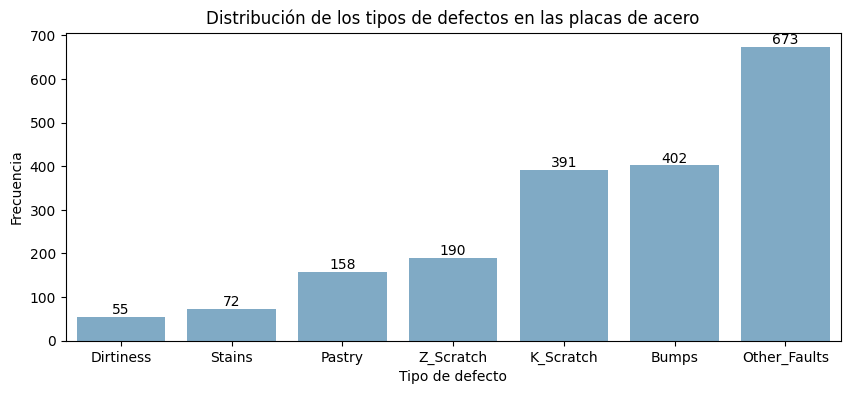

In [18]:
fault_types_distribution_graph = plt.figure(figsize = (10, 4))
ax = sns.barplot(sum_faults, color = "#74add1")
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Tipo de defecto")
plt.ylabel("Frecuencia")
plt.title("Distribución de los tipos de defectos en las placas de acero", size = 12)

Text(0.5, 1.0, 'Distribución de los tipos de defectos en las placas de acero')

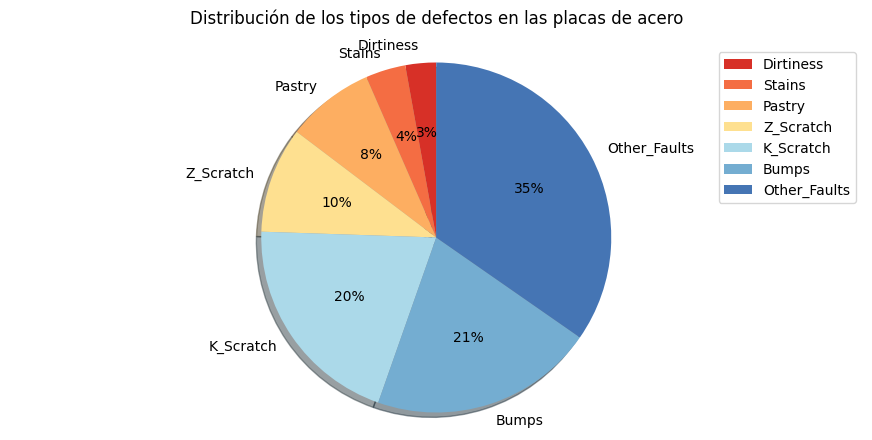

In [19]:
fault_types_distribution_pie = plt.figure(figsize = (11, 5))
colors = ["#d73027", "#f46d43", "#fdae61", "#fee090", "#abd9e9", "#74add1", "#4575b4"]
plt.pie(sum_faults, labels = sum_faults.index, startangle = 90, autopct = "%1.0f%%", shadow = True, colors = colors)
plt.axis("equal")
plt.legend()
plt.title("Distribución de los tipos de defectos en las placas de acero", pad = 15)

#### **Features**

El siguiente paso es examinar cada característica del conjunto de datos para obtener una visión general de sus distribuciones. Dado que todas están en diferentes escalas, será necesario escalar las características en los próximos pasos.

Los histogramas revelan información valiosa sobre la distribución de las características.

- **Distribución normal**: Maximum_of_Luminosity, Empty_Index, Square_Index, Luminosity_Index, Minimum_of_Luminosity y Orientation_Index.
- **Distribución sesgada**: Y_Minimum, Y_Maximum, Pixels_Areas, X_Perimeter, Y_Perimeter, Sum_of_Luminosity, Log_Y_Index y Edges_X_Index.
- **Distribución uniforme**: X_Minimum, X_Maximum, EdgesIndex, Edges_Y_Index y SigmoidOfAreas.

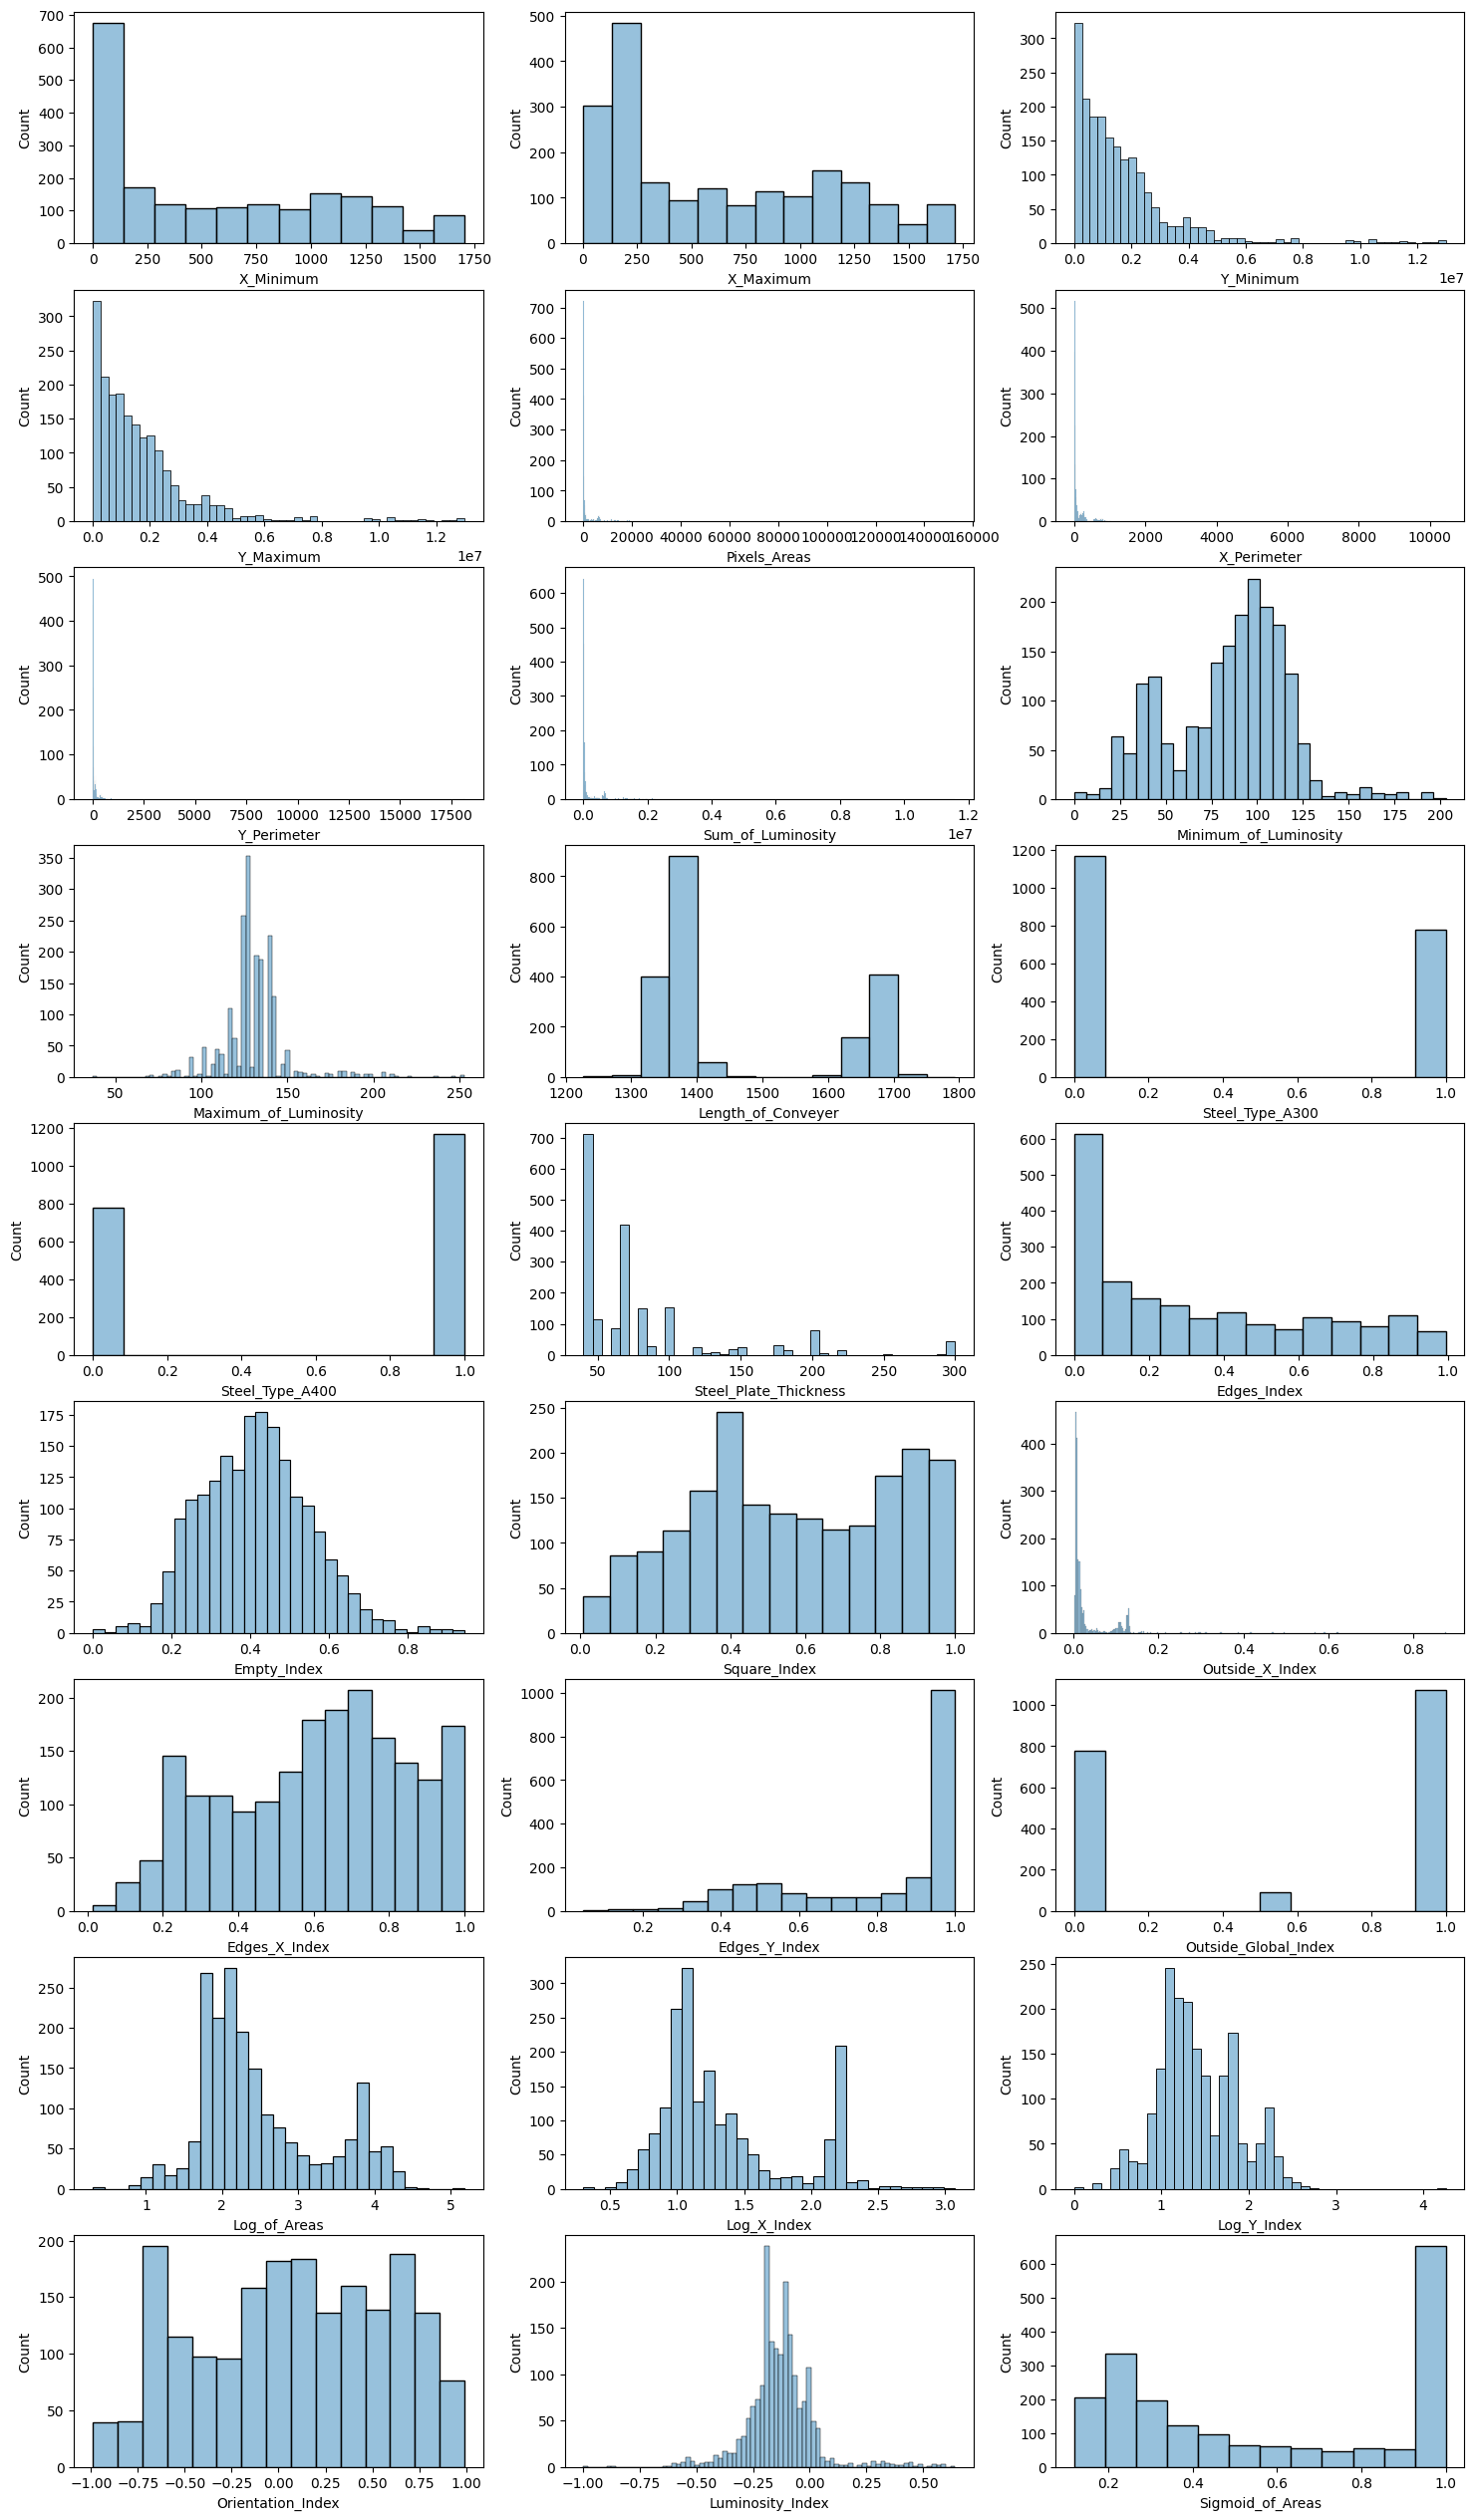

In [20]:
# Plot distribution of all features on the datasest
fig, ax = plt.subplots(9, 3, figsize = (18, 32))
for i, col in enumerate(defect_detection.columns[:27]):
    sns.histplot(defect_detection[col], ax = ax[i//3][i%3], color = "#74add1")

#### **Matriz de correlación**

In [21]:
correlations = defect_detection.corr()
correlations

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,Sigmoid_of_Areas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
X_Minimum,1.00,0.99,0.04,0.04,-0.31,-0.26,-0.12,-0.34,0.24,-0.08,...,0.18,-0.03,-0.36,0.13,-0.23,-0.42,0.07,0.10,0.22,0.16
X_Maximum,0.99,1.00,0.05,0.05,-0.23,-0.19,-0.09,-0.25,0.17,-0.06,...,0.12,-0.04,-0.29,0.12,-0.26,-0.34,0.06,0.10,0.20,0.15
Y_Minimum,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,-0.09,-0.09,0.03,0.04,-0.06,-0.00,-0.07,0.06,0.13,-0.08
Y_Maximum,0.04,0.05,1.00,1.00,0.02,0.02,0.02,0.01,-0.07,-0.07,...,-0.09,-0.09,0.03,0.04,-0.06,-0.00,-0.07,0.06,0.13,-0.08
Pixels_Areas,-0.31,-0.23,0.02,0.02,1.00,0.97,0.83,0.98,-0.50,0.11,...,-0.14,-0.04,0.42,-0.08,-0.09,0.56,-0.07,-0.05,-0.16,-0.18
X_Perimeter,-0.26,-0.19,0.02,0.02,0.97,1.00,0.91,0.91,-0.40,0.11,...,-0.10,-0.03,0.38,-0.08,-0.06,0.46,-0.07,-0.04,-0.14,-0.14
Y_Perimeter,-0.12,-0.09,0.02,0.02,0.83,0.91,1.00,0.70,-0.21,0.06,...,0.03,-0.05,0.19,-0.02,-0.03,0.20,-0.04,-0.01,-0.07,-0.07
Sum_of_Luminosity,-0.34,-0.25,0.01,0.01,0.98,0.91,0.70,1.00,-0.54,0.14,...,-0.16,-0.01,0.46,-0.08,-0.10,0.62,-0.08,-0.06,-0.18,-0.21
Minimum_of_Luminosity,0.24,0.17,-0.07,-0.07,-0.50,-0.40,-0.21,-0.54,1.00,0.43,...,0.06,0.67,-0.51,-0.07,0.05,-0.46,0.18,0.09,0.08,0.23
Maximum_of_Luminosity,-0.08,-0.06,-0.07,-0.07,0.11,0.11,0.06,0.14,0.43,1.00,...,-0.17,0.87,-0.04,-0.06,-0.19,0.19,0.09,0.02,-0.05,-0.01


Text(0.5, 1.0, 'Correlation Heatmap')

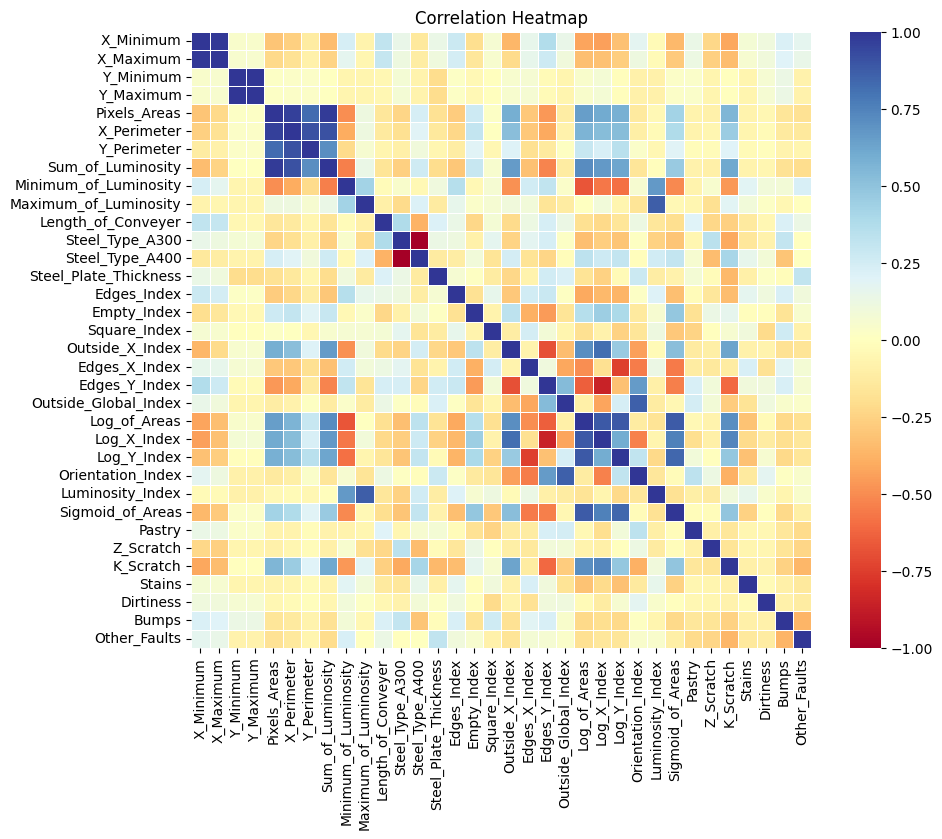

In [22]:
correlation_heatmap_graph = plt.figure(figsize = (10, 8))
sns.heatmap(correlations, linewidths = 0.5, cmap = "RdYlBu")
plt.title("Correlation Heatmap", size = 12)

La matriz de correlación muestra las relaciones entre variables: el color rojo indica que la relación es negativa, el azul que la relación es positiva y el color amarillo que la relación es baja o nula. Puesto que hay un alto número de características correlacionadas es necesario crear nuevas características a partir de éstas para reducir el número total de características en el dataset y facilitar el modelado.

### Feature Engineering

De acuerdo con los resultados obtenidos de la matrix de correlación, se crean nuevas variables. Las variables que ya no sean necesarias se eliminarán del conjunto de datos. 

In [23]:
# Create new variables
defect_detection["X_Range"] = defect_detection["X_Maximum"] - defect_detection["X_Minimum"]
defect_detection["Y_Range"] = defect_detection["Y_Maximum"] - defect_detection["Y_Minimum"]
defect_detection["Defect_Area"] = (defect_detection["X_Perimeter"] * defect_detection["Y_Perimeter"])
defect_detection["Luminosity_Range"] = defect_detection["Maximum_of_Luminosity"] - defect_detection["Minimum_of_Luminosity"]
defect_detection["Edge"] = defect_detection["Edges_Index"] / (defect_detection["Edges_X_Index"] * defect_detection["Edges_Y_Index"])
defect_detection["Outside_X_Range"] = defect_detection["Outside_X_Index"] * defect_detection["X_Range"]
defect_detection["Log_Area"] = defect_detection["Log_of_Areas"] / (0.000001 + defect_detection["Log_X_Index"] * defect_detection ["Log_Y_Index"])
defect_detection["Luminosity_Sum_Range"] = defect_detection["Sum_of_Luminosity"] * defect_detection["Luminosity_Range"]
defect_detection["Log_Area_Sigmoid"] = defect_detection["Log_Area"] * defect_detection["Sigmoid_of_Areas"]

In [24]:
defect_detection.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'Steel_Type_A300', 'Steel_Type_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index',
       'Log_of_Areas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index',
       'Luminosity_Index', 'Sigmoid_of_Areas', 'Pastry', 'Z_Scratch',
       'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'X_Range',
       'Y_Range', 'Defect_Area', 'Luminosity_Range', 'Edge', 'Outside_X_Range',
       'Log_Area', 'Luminosity_Sum_Range', 'Log_Area_Sigmoid'],
      dtype='object')

In [25]:
# Drop unnecessary columns
columns_to_drop = ["X_Minimum", "X_Maximum", "Y_Minimum", "Y_Maximum", "X_Perimeter", "Y_Perimeter", "Minimum_of_Luminosity", "Maximum_of_Luminosity",
                   "Outside_X_Index", "Edges_Index", "Edges_X_Index", "Edges_Y_Index","Log_of_Areas", "Log_X_Index", "Log_Y_Index", "Sum_of_Luminosity", 
                   "Luminosity_Range", "Sigmoid_of_Areas"]

defect_detection = defect_detection.drop(columns_to_drop, axis = 1)
defect_detection

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,...,Bumps,Other_Faults,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid
0,267,1687,1,0,80,0.24,0.18,1.00,0.82,-0.29,...,0,0,8,44,748,0.11,0.04,1.63,775040,0.95
1,108,1687,1,0,80,0.38,0.21,1.00,0.79,-0.18,...,0,0,6,29,300,1.32,0.02,1.79,444483,0.53
2,71,1623,1,0,100,0.34,0.33,1.00,0.67,-0.12,...,0,0,6,18,152,1.37,0.02,1.90,207272,0.41
3,176,1353,0,1,290,0.44,0.16,1.00,0.84,-0.16,...,0,0,7,45,585,1.35,0.04,1.61,512892,0.84
4,2409,1353,0,1,185,0.45,0.07,1.00,0.93,-0.20,...,0,0,17,257,15600,0.25,0.21,1.14,21976770,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,273,1360,0,1,40,0.39,0.57,0.00,-0.43,0.00,...,0,1,28,16,1188,0.97,0.58,1.40,770726,1.01
1937,287,1360,0,1,40,0.46,0.55,0.00,-0.45,-0.06,...,0,1,31,17,1056,0.42,0.71,1.34,726579,1.09
1938,292,1360,0,1,40,0.33,0.52,0.00,-0.48,0.01,...,0,1,29,15,880,0.43,0.62,1.43,751440,1.01
1939,419,1360,0,1,40,0.59,0.94,0.00,-0.06,-0.02,...,0,1,33,31,4559,0.90,0.80,1.16,1212445,1.15


In [26]:
# Show columns after dropping the unnecessary ones
defect_detection.columns

Index(['Pixels_Areas', 'Length_of_Conveyer', 'Steel_Type_A300',
       'Steel_Type_A400', 'Steel_Plate_Thickness', 'Empty_Index',
       'Square_Index', 'Outside_Global_Index', 'Orientation_Index',
       'Luminosity_Index', 'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'X_Range', 'Y_Range',
       'Defect_Area', 'Edge', 'Outside_X_Range', 'Log_Area',
       'Luminosity_Sum_Range', 'Log_Area_Sigmoid'],
      dtype='object')

In [27]:
# Plot again the correlation matrix with the new features
correlations_2 = defect_detection.corr()
correlations_2

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,...,Bumps,Other_Faults,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid
Pixels_Areas,1.00,-0.16,-0.24,0.24,-0.18,0.27,0.02,-0.11,-0.14,-0.04,...,-0.16,-0.18,0.59,0.73,0.68,-0.03,0.32,-0.01,0.98,-0.01
Length_of_Conveyer,-0.16,1.00,0.38,-0.38,0.21,-0.23,0.07,0.13,0.12,-0.15,...,0.23,0.13,-0.20,-0.04,-0.02,-0.01,-0.09,-0.02,-0.13,-0.02
Steel_Type_A300,-0.24,0.38,1.00,-1.00,0.13,-0.09,0.16,0.02,0.01,-0.25,...,0.31,-0.01,-0.24,-0.05,-0.02,-0.03,-0.07,-0.03,-0.22,-0.03
Steel_Type_A400,0.24,-0.38,-1.00,1.00,-0.13,0.09,-0.16,-0.02,-0.01,0.25,...,-0.31,0.01,0.24,0.05,0.02,0.03,0.07,0.03,0.22,0.03
Steel_Plate_Thickness,-0.18,0.21,0.13,-0.13,1.00,0.01,-0.12,0.22,0.27,-0.12,...,-0.02,0.32,-0.23,-0.02,-0.02,0.08,-0.08,-0.02,-0.18,-0.02
Empty_Index,0.27,-0.23,-0.09,0.09,0.01,1.00,-0.08,-0.17,-0.14,0.06,...,-0.17,0.05,0.34,0.13,0.09,0.14,0.21,-0.10,0.26,-0.10
Square_Index,0.02,0.07,0.16,-0.16,-0.12,-0.08,1.00,-0.07,-0.16,0.11,...,0.26,-0.09,-0.11,-0.07,-0.04,-0.18,-0.11,-0.01,0.07,-0.01
Outside_Global_Index,-0.11,0.13,0.02,-0.02,0.22,-0.17,-0.07,1.00,0.86,-0.12,...,0.04,0.04,-0.34,0.04,0.02,0.07,-0.16,-0.04,-0.09,-0.04
Orientation_Index,-0.14,0.12,0.01,-0.01,0.27,-0.14,-0.16,0.86,1.00,-0.15,...,0.01,0.04,-0.44,0.07,0.04,0.13,-0.22,-0.04,-0.11,-0.04
Luminosity_Index,-0.04,-0.15,-0.25,0.25,-0.12,0.06,0.11,-0.12,-0.15,1.00,...,-0.06,0.04,-0.04,-0.06,-0.04,0.12,-0.01,0.03,-0.01,0.03


Text(0.5, 1.0, 'Correlation Heatmap')

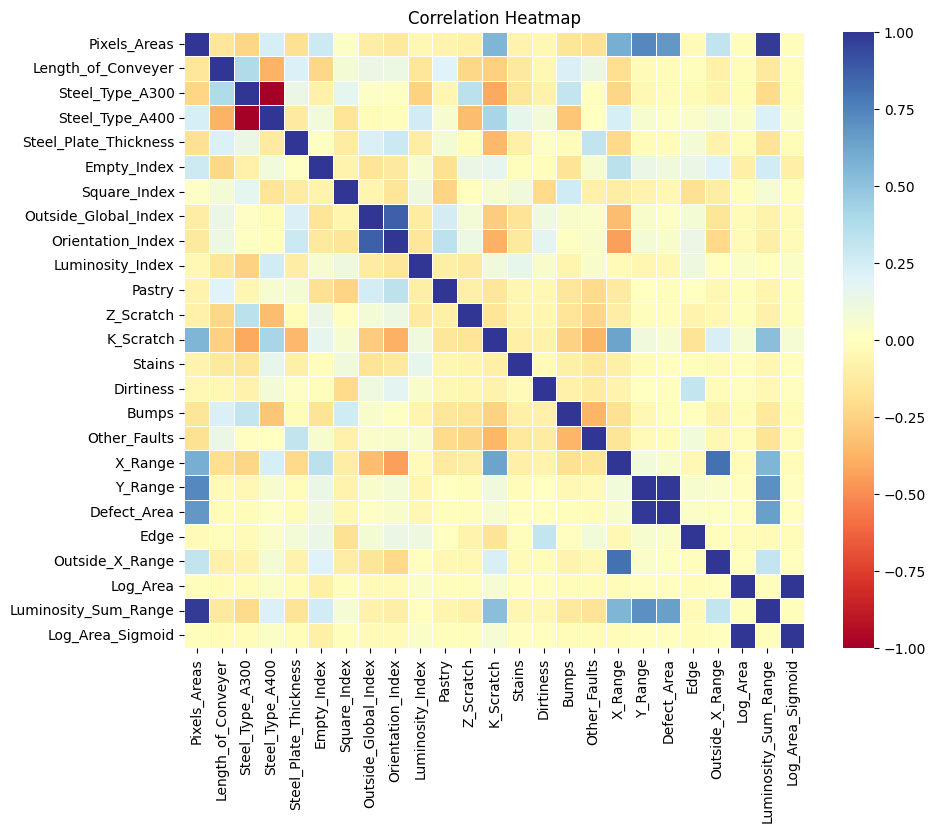

In [28]:
correlation_heatmap_graph_2 = plt.figure(figsize = (10, 8))
sns.heatmap(correlations_2, linewidths = 0.5, cmap = "RdYlBu")
plt.title("Correlation Heatmap", size = 12)

In [29]:
# Save the feature engineered dataset
defect_detection.to_csv("../data/feature-engineering/Steel-plates-faults-feature-engineering-dataset.csv")

### Pre-processing

Antes de comenzar con el modelado, será necesario hacer unas transformaciones en el conjunto de datos.

- **Nueva columna de Fallos**

Crea una nueva columna que contenga todos los tipos de fallos. Esta columna será la variable objetivo y facilitará el modelado y la predicción.

In [30]:
# List of faults and their corresponding values
fault_mapping = {"Pastry": 0, "Z_Scratch": 1, "K_Scratch": 2, "Stains": 3, "Dirtiness": 4, "Bumps": 5, "Other_Faults": 6}

# Initialize the Faults column
defect_detection["Faults"] = 0

# Loop through each fault and assign the corresponding value
for fault, value in fault_mapping.items():
    defect_detection.loc[defect_detection[fault] == 1, "Faults"] = value

# Display the first few rows
defect_detection.head()

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,...,Other_Faults,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid,Faults
0,267,1687,1,0,80,0.24,0.18,1.00,0.82,-0.29,...,0,8,44,748,0.11,0.04,1.63,775040,0.95,0
1,108,1687,1,0,80,0.38,0.21,1.00,0.79,-0.18,...,0,6,29,300,1.32,0.02,1.79,444483,0.53,0
2,71,1623,1,0,100,0.34,0.33,1.00,0.67,-0.12,...,0,6,18,152,1.37,0.02,1.90,207272,0.41,0
3,176,1353,0,1,290,0.44,0.16,1.00,0.84,-0.16,...,0,7,45,585,1.35,0.04,1.61,512892,0.84,0
4,2409,1353,0,1,185,0.45,0.07,1.00,0.93,-0.20,...,0,17,257,15600,0.25,0.21,1.14,21976770,1.14,0


In [31]:
# Drop individual fault columns
defect_detection.drop(faults, axis = 1, inplace=True)

In [32]:
defect_detection.head()

,Pixels_Areas,Length_of_Conveyer,Steel_Type_A300,Steel_Type_A400,Steel_Plate_Thickness,Empty_Index,Square_Index,Outside_Global_Index,Orientation_Index,Luminosity_Index,X_Range,Y_Range,Defect_Area,Edge,Outside_X_Range,Log_Area,Luminosity_Sum_Range,Log_Area_Sigmoid,Faults
0,267,1687,1,0,80,0.24,0.18,1.00,0.82,-0.29,8,44,748,0.11,0.04,1.63,775040,0.95,0
1,108,1687,1,0,80,0.38,0.21,1.00,0.79,-0.18,6,29,300,1.32,0.02,1.79,444483,0.53,0
2,71,1623,1,0,100,0.34,0.33,1.00,0.67,-0.12,6,18,152,1.37,0.02,1.90,207272,0.41,0
3,176,1353,0,1,290,0.44,0.16,1.00,0.84,-0.16,7,45,585,1.35,0.04,1.61,512892,0.84,0
4,2409,1353,0,1,185,0.45,0.07,1.00,0.93,-0.20,17,257,15600,0.25,0.21,1.14,21976770,1.14,0


- **Dividir los datos**

Al dividir los datos en un conjunto de entrenamiento y uno de prueba, se asegura que el escalado se base únicamente en los datos de entrenamiento, evitando que cualquier información del conjunto de prueba se filtren en el modelo durante el entrenamiento.

In [33]:
# Independent features
X = defect_detection.drop("Faults", axis = 1)

# Dependent or target variable
y = defect_detection["Faults"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Training set - X_train shape:", X_train.shape)
print("Testing set - X_test shape:", X_test.shape)
print("Training set - y_train shape:", y_train.shape)
print("Testing set - y_test shape:", y_test.shape)

Training set - X_train shape: (1552, 18)
Testing set - X_test shape: (389, 18)
Training set - y_train shape: (1552,)
Testing set - y_test shape: (389,)


- **Escalado de características**

El método utilizado es el de escalado estándar. 

In [34]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

### Modelado

El objetivo de este ejercicio es construir un modelo que clasifique los defectos de placas de acero industrial. Para ello, el primer paso es encontrar el algoritmo que mejor rendimiento presente y a partir de ahí, se afinarán los hiperparámetros del este modelo para encontrar la mejor versión del modelo ganador. Los algoritmos elegidos para comenzar el modelado son: **Decision Tree**, **Random Forest**, **XGBoost**, **Support Vector Machine** y **Multilayer Perceptron**. 

Decision Tree Model:
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        29
           1       0.81      0.83      0.82        41
           2       0.94      0.93      0.93        83
           3       0.86      0.92      0.89        13
           4       0.44      0.50      0.47         8
           5       0.49      0.61      0.55        72
           6       0.71      0.61      0.65       143

    accuracy                           0.70       389
   macro avg       0.67      0.69      0.68       389
weighted avg       0.71      0.70      0.70       389

Random Forest Model:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        29
           1       0.95      0.90      0.93        41
           2       0.98      0.95      0.96        83
           3       1.00      0.92      0.96        13
           4       0.60      0.38      0.46         8
           5       0.61      0.57   

Text(0, 0.5, 'Valor real')

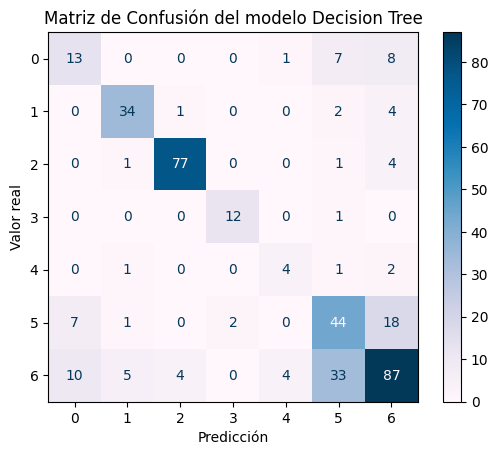

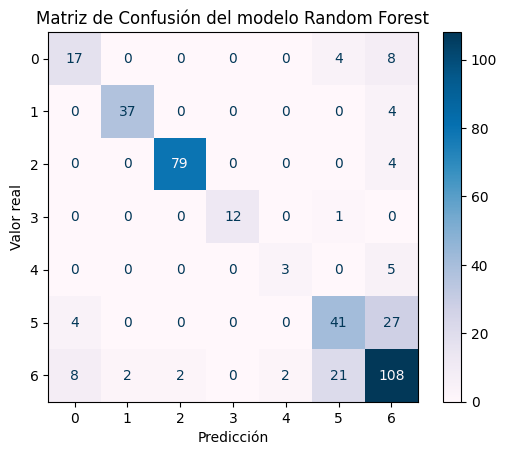

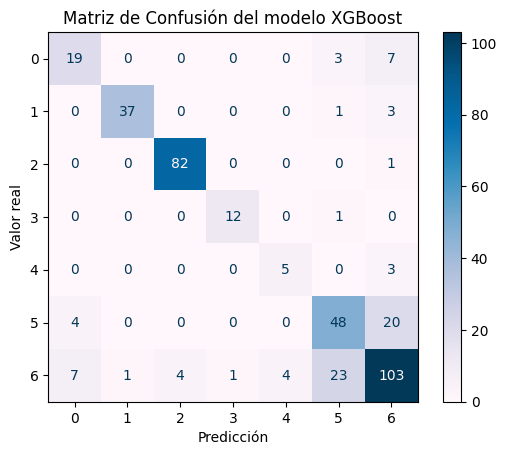

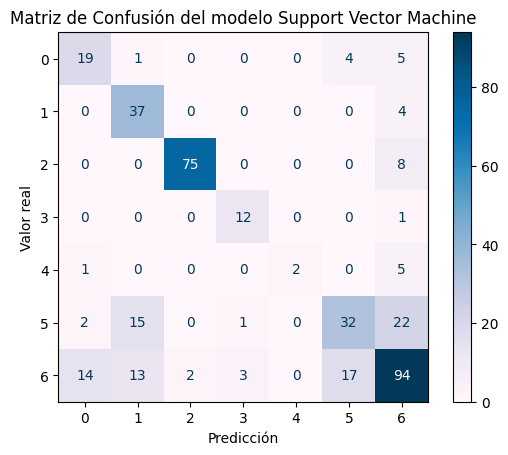

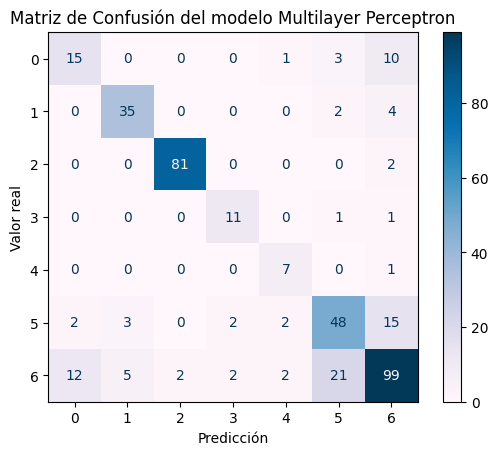

In [35]:
# 1. Decision Tree
print("Decision Tree Model:")
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
print(classification_report(y_test, dt_predictions))
dt_cm = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(confusion_matrix = dt_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Decision Tree")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 2. Random Forest
print("Random Forest Model:")
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
print(classification_report(y_test, rf_predictions))
rf_cm = confusion_matrix(y_test, rf_predictions)
ConfusionMatrixDisplay(confusion_matrix = rf_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 3. XGBoost
print("XGBoost Model:")
xgb_model = XGBClassifier(random_state = 42)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, xgb_predictions))
xgb_cm = confusion_matrix(y_test, xgb_predictions)
ConfusionMatrixDisplay(confusion_matrix = xgb_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 4. Support Vector Machine
print("Support Vector Machine Model:")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
print(classification_report(y_test, svm_predictions))
svm_cm = confusion_matrix(y_test, svm_predictions)
ConfusionMatrixDisplay(confusion_matrix = svm_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Support Vector Machine")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

# 5. Multilayer Perceptron
print("Multilayer Perceptron Model:")
mlp_model = MLPClassifier(random_state = 42, max_iter = 500)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
print(classification_report(y_test, mlp_predictions))
mlp_cm = confusion_matrix(y_test, mlp_predictions)
ConfusionMatrixDisplay(confusion_matrix = mlp_cm).plot(cmap = "PuBu")
plt.title("Matriz de Confusión del modelo Multilayer Perceptron")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

Entre todos los modelos probados, **XGBoost** destaca como el más efectivo, alcanzando una precisión de **0.79** y sobresaliendo tanto en precisión como en recall en varias clases. Su F1-score macro promedio de **0.78** refuerza su rendimiento equilibrado.

**Random Forest** y **Multilayer Perceptron** le siguen de cerca con una precisión de **0.76**. Ambos ofrecen resultados sólidos, pero no logran igualar la efectividad de XGBoost. Por otro lado, **Árbol de Decisión** y **Máquina de Vectores de Soporte** solo alcanzan una precisión de **0.70**, teniendo más dificultades en la clasificación de algunas clases.

**XGBoost** es la opción más acertada si el objetivo es maximizar la precisión del model y tener un rendimiento equilibrado. Además, un ajuste adicional de los hiperparámetros podría llevar su rendimiento a otro nivel.

### XGBoost

XGBoost es el modelo seleccionado para abordar esta tarea de clasificación. Ahora es el momento de comprender el modelo y encontrar los mejores hiperparámetros.

#### **Hyperparameter Tuning**

Primero, se optimiza el modelo para mejorar su rendimiento. Este modelo ajustado funciona mejor que el original, pero aún presenta dificultades para clasificar las clases minoritarias, como la clase 4, que corresponde al defecto "suciedad" y tiene muy pocas observaciones en el conjunto de datos. Para solucionar este problema, es necesario aplicar una técnica de muestreo. Dado que las observaciones son escasas, decidí utilizar la técnica **SMOTE** para mejorar la clasificación.

In [36]:
# Define the model
model = xgb.XGBClassifier(random_state = 42)

# Define the hyperparameter grid
param_grid = {"max_depth": [3, 5, 7],
              "learning_rate": [0.01, 0.1, 0.2],
              "n_estimators": [100, 200, 300],
              "subsample": [0.6, 0.8, 1.0]}

# Set up Grid Search
grid_search = GridSearchCV(estimator = model, 
                           param_grid = param_grid,
                           scoring = "f1_macro",
                           cv = 3,
                           verbose = 1,
                           n_jobs = -1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.7630419064415506
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        29
           1       0.95      0.93      0.94        41
           2       0.96      0.99      0.98        83
           3       1.00      0.92      0.96        13
           4       0.57      0.50      0.53         8
           5       0.60      0.62      0.61        72
           6       0.74      0.73      0.74       143

    accuracy                           0.79       389
   macro avg       0.79      0.77      0.78       389
weighted avg       0.79      0.79      0.79       389



#### **SMOTE**

SMOTE es una técnica de re-muestreo que crea nuevas muestras ajustando ligeramente los datos existentes hacia sus vecinos. Funciona eligiendo aleatoriamente una muestra de la clase minoritaria, identificando sus k vecinos más cercanos y generando nuevos puntos de datos al escalar la distancia hacia esos vecinos. De esta manera, se mantiene la integridad de la clase minoritaria y se enriquece el conjunto de datos.

Una vez dividido el conjunto de datos en entrenamiento y prueba, aplicamos SMOTE **solamente** al conjunto de entrenamiento. Esto asegura que el conjunto de prueba siga siendo una representación fiel de la distribución original de los datos y previene cualquier filtración de información desde el conjunto de entrenamiento. Así, garantizamos que el proceso de evaluación sea más sólido y confiable.

In [37]:
# Apply SMOTE to the training data
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Fit the XGBoost model on the resampled data
xgb_smote_model = XGBClassifier(random_state = 42)
xgb_smote_model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
xgb_smote_pred = xgb_smote_model.predict(X_test_scaled)
print(classification_report(y_test, xgb_smote_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        29
           1       0.93      0.93      0.93        41
           2       0.95      0.98      0.96        83
           3       0.92      0.92      0.92        13
           4       0.58      0.88      0.70         8
           5       0.68      0.72      0.70        72
           6       0.79      0.72      0.75       143

    accuracy                           0.80       389
   macro avg       0.78      0.83      0.80       389
weighted avg       0.81      0.80      0.80       389



El modelo XGBoost con SMOTE se destaca claramente como el mejor en comparación con el modelo XGBoost ajustado, logrando una precisión del 80% y un F1-score macro promedio de 0.80. Aunque la precisión de ambos modelos es similar, uno de los puntos fuertes de este modelo es la capacidad para identificar eficazmente instancias de clases minoritarias, como la clase 4, donde logró un valor de recall del 88%, mientras que el modelo original alcanzó 62% y el ajustado solo alcanzó el 50%.

Además, el modelo SMOTE muestra un rendimiento constante en las clases mayoritarias, lo que demuestra su fiabilidad y un rendimiento bastante sólido en general. Esto lo convierte en la mejor opción para aplicaciones del mundo real, especialmente en conjuntos de datos desbalanceados donde cada clase es importante.

In [ ]:
# Save the trained model as pickle format
with open("../model/xgboost_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

In [41]:
# Save the trained model as a json file
xgb_model.save_model("../model/xgboost_model.json")

#### **Matriz de Confusión**

Analizar la matriz de confusión nos ayuda a comprender las clasificaciones incorrectas y a identificar áreas potenciales de mejora. 

In [ ]:
# Plot XGBoost Confusion Matrix
xgb_smote_model_cm = confusion_matrix(y_test, xgb_predictions)
ConfusionMatrixDisplay(confusion_matrix = xgb_smote_model_cm).plot(cmap = "PuBu")
plt.title("Matriz de confusión del modelo XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Valor real")

#### **Importancia de las características**

Identificar las características clave que impulsan las predicciones es fundamental para comprender cómo el modelo toma decisiones.

In [ ]:
# Plot feature importance
xgboost_feature_importance = plt.figure(figsize = (15, 3))
xgb.plot_importance(xgb_smote_model,
                    importance_type = "weight",
                    color = "#74add1",
                    title = "Importancia de características de XGBoost",
                    xlabel = "Peso",
                    ylabel = "Características")

#### **ROC AUC**

Evalúa el rendimiento del modelo de manera integral.

In [ ]:
# Binarize the output
y_bin = label_binarize(y_test, classes = [0, 1, 2, 3, 4, 5, 6])
y_score = xgb_smote_model.predict_proba(X_test_scaled)

# Compute ROC AUC for each class
roc_auc = roc_auc_score(y_bin, y_score, average = "macro")
print(f"XGBoost Model ROC AUC Score: {roc_auc:.2f}")

In [ ]:
# Binarize the output
y_bin = label_binarize(y_test, classes = [0, 1, 2, 3, 4, 5, 6])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], xgb_smote_model.predict_proba(X_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the curves
plt.figure(figsize = (11, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color = colors[i], label = "ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva Característica de Operación del Receptor (ROC)")
plt.legend(loc = "lower right")

#### **Curvas de Aprendizaje**

Evalúa el comportamiento del entrenamiento del modelo y detecta problemas de sesgo.

In [ ]:
# Plot the learning curves of the model
plt.figure(figsize = (11, 4))

train_sizes, train_scores, test_scores = learning_curve(xgb_smote_model, X_resampled, y_resampled, cv = 5, n_jobs = -1, train_sizes = np.linspace(0.1, 1.0, 10))
train_scores_mean = train_scores.mean(axis = 1)
test_scores_mean = test_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, color = "#74add1", label = "Puntuación de entrenamiento")
plt.plot(train_sizes, test_scores_mean, color = "#f46d43", label = "Puntuación de validación cruzada")
plt.title("Curva de aprendizaje del modelo XGBoost")
plt.xlabel("Tamaño de entrenamiento")
plt.ylabel("Puntuación")
plt.legend(loc = "best")

#### **Curva de Precisión-Recall**

Evalúa el rendimiento del modelo en términos de precisión y recuperación, especialmente útil en casos de clases desbalanceadas.

In [ ]:
# Plot the precision-recall curve
plt.figure(figsize=(11, 4))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], xgb_smote_model.predict_proba(X_test_scaled)[:, i])
    plt.plot(recall, precision, color = colors[i], label = f"Curva de Precisión-Recuperación de la clase {i}")
plt.xlabel("Recuperación")
plt.ylabel("Precisión")
plt.title("Curva de Precisión-Recuperación")
plt.legend(loc = "lower left")

### Conclusiones

El objetivo de este ejercicio fue construir un modelo de machine learning para detectar anomalías o defectos en placas de acero industrial. Para lograrlo, se inició con la limpieza del conjunto de datos, un paso fundamental para asegurar la integridad y confiabilidad de la información. Seguidamente, se realizó un análisis exploratorio detallado que permitió comprender mejor la distribución y las relaciones entre las variables. Este análisis incluyó la evaluación individual de cada variable y la exploración de interacciones significativas entre pares de ellas. Esto permitió crear nuevas variables que hacen más fácil el modelado. 

Para determinar el modelo óptimo para la predicción de anomalías, se probaron varios enfoques: decision tree, random forest, xgboost, support vector machine y multilayer perceptron. Se concluyó que el modelo con mejor rendimiento fue XGBoost. Posteriormente, se buscó encontrar los hiperparámetros ideales para este modelo. Dado que durante la exploración de datos se identificó un desbalance en el conjunto, se aplicó la técnica de re-muestreo **SMOTE**. Este modelo no solo mostró el mejor rendimiento, sino que también destacó en precisión y recall.

En resumen, se construyó un modelo de machine learning robusto capaz de distinguir entre clases minoritarias y mayoritarias, ofreciendo un rendimiento sólido y constituyendo la mejor opción para resolver este problema.. 